In [4]:
# Script that analyzes climate simulation input data
# Also plots change in vegetation cover in the simulaition input data
# Creates binary to count how many types of trees or grass exist in areas (10% coverage or more)
# Regrid Hansen data to fit the climate simulation data format and grid
# Create logic to transfer the Hansen data to the format of the simulation data
import netCDF4 as nc4
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

In [20]:
# Open the climate simulation data file
datapath='/home/disk/eos18/aswann/Macrosystems_ecoclimtel_test/CLM_transient_land_use/landuse.timeseries_0.9x1.25_hist_78pfts_CMIP6_simyr1850-2015_c170824.nc'
ds = xr.open_dataset(datapath)
PCT_NAT_PFT = ds.PCT_NAT_PFT

In [27]:
PCT_NAT_PFT[150,0,0,0].head

<bound method DataArray.head of <xarray.DataArray 'PCT_NAT_PFT' ()>
array(100.)
Coordinates:
    natpft   int32 0
    time     int32 2000
Attributes:
    long_name:  percent plant functional type on the natural veg landunit (% ...
    units:      unitless>

In [33]:
#diff_00_15.shape

In [34]:
# Initialize lat and lon vectors based on the shape of the dataset
lat_vector = np.arange(-90,90, 180/192)
lon_vector = np.arange(0,360, 360/288)

/home/disk/p/rlys/anaconda3/envs/pangeo_copy/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1665: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


Text(0.5, 1.0, 'Forest Loss 2000-2015: Climate Similation Input Data')

/home/disk/p/rlys/anaconda3/envs/pangeo_copy/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


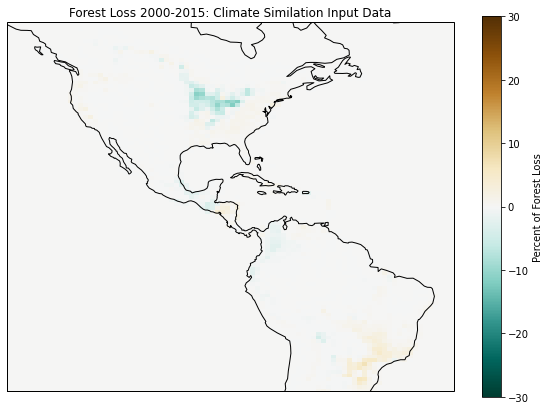

In [9]:
# Plotting change from 2000 to 2015, All tropical and temperate trees

#diff_00_15 = PCT_NAT_PFT[165,4,:,:] - PCT_NAT_PFT[0,4,:,:]
diff_00_15 = PCT_NAT_PFT[165,4,:,:] + PCT_NAT_PFT[165,1,:,:] \
+ PCT_NAT_PFT[165,5,:,:] + PCT_NAT_PFT[165,6,:,:] + PCT_NAT_PFT[165,7,:,:] \
- PCT_NAT_PFT[150,4,:,:] - PCT_NAT_PFT[150,1,:,:] \
- PCT_NAT_PFT[150,5,:,:] - PCT_NAT_PFT[150,6,:,:] - PCT_NAT_PFT[150,7,:,:]

projection = ccrs.PlateCarree()
fig= plt.figure(figsize=(10,7))
ax1 = plt.axes(projection=projection)
ax1.set_global()
ax1.coastlines()
ax1.set_extent([-140, -30, -19, 45])

plt.pcolor(lon_vector, lat_vector, diff_00_15*(-1), transform=ccrs.PlateCarree(), cmap = 'BrBG_r', vmin = -30, vmax = 30)

plt.colorbar(label = 'Percent of Forest Loss')
plt.title("Forest Loss 2000-2015: Climate Similation Input Data")


/home/disk/p/rlys/anaconda3/envs/pangeo_copy/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1665: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


Text(0.5, 1.0, 'Forest Loss 1850-2015')

/home/disk/p/rlys/anaconda3/envs/pangeo_copy/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


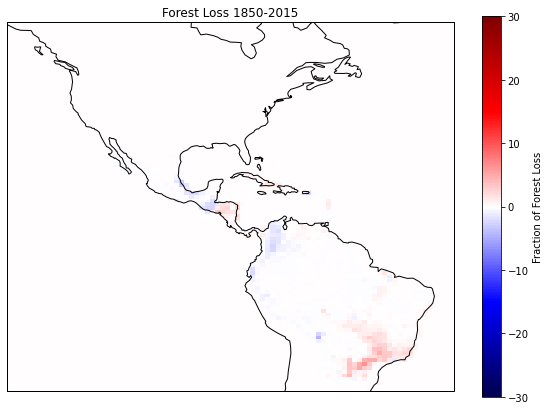

In [10]:
# Plot of just type 4 from 2000-2015
diff_00_15 = PCT_NAT_PFT[165,4,:,:] - PCT_NAT_PFT[150,4,:,:]

projection = ccrs.PlateCarree()
fig= plt.figure(figsize=(10,7))
ax1 = plt.axes(projection=projection)
ax1.set_global()
ax1.coastlines()
ax1.set_extent([-140, -30, -19, 45])

plt.pcolor(lon_vector, lat_vector, diff_00_15*(-1), transform=ccrs.PlateCarree(), cmap = 'seismic', vmin = -30, vmax = 30)


plt.colorbar(label = 'Fraction of Forest Loss')
plt.title("Forest Loss 1850-2015")

Text(0.5, 1.0, 'Plant Index Number: 14')

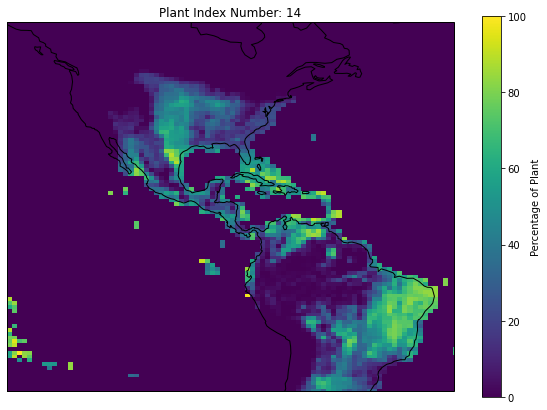

In [11]:
# Plotting mean of different places for all plant types

plant_index_number = 14

mean = PCT_NAT_PFT[:,plant_index_number,:,:].mean(dim='time')

projection = ccrs.PlateCarree()
fig= plt.figure(figsize=(10,7))
ax1 = plt.axes(projection=projection)
ax1.set_global()
ax1.coastlines()
ax1.set_extent([-140, -30, -19, 45])

plt.pcolor(lon_vector, lat_vector, mean, transform=ccrs.PlateCarree(), vmin = 0, vmax = 100)


plt.colorbar(label = 'Percentage of Plant')
plt.title("Plant Index Number: " + str(plant_index_number))


In [35]:
# Fuction that takes in the larger file and returns a binary of places where the inputed plant types is over 10%

def plant_binary(file, plant_num):
    plant_num = int(plant_num)
    plant = PCT_NAT_PFT[:,plant_num,:,:].mean(dim='time')
    plant = plant.where(plant>=10)
    plant_return = plant
    
    for i in np.arange(0, 192):
        for j in np.arange(0, 288):
            if plant_return[i, j] > 0:
                plant_return[i, j] = 1
            elif plant_return[i, j] < 0:
                plant_return[i, j] = 1
            else:
                plant_return[i, j] = 0
    return plant_return

In [36]:
# Tree 1 passed through the binary
plant_1 = plant_binary(PCT_NAT_PFT, 1)

In [38]:
# Rest of Trees
plant_2 = plant_binary(PCT_NAT_PFT, 2)
plant_3 = plant_binary(PCT_NAT_PFT, 3)
plant_4 = plant_binary(PCT_NAT_PFT, 4)
plant_5 = plant_binary(PCT_NAT_PFT, 5)
plant_6 = plant_binary(PCT_NAT_PFT, 6)
plant_7 = plant_binary(PCT_NAT_PFT, 7)
plant_8 = plant_binary(PCT_NAT_PFT, 8)

In [39]:
%store plant_1
%store plant_2
%store plant_3
%store plant_4
%store plant_5
%store plant_6
%store plant_7
%store plant_8

Stored 'plant_1' (DataArray)
Stored 'plant_2' (DataArray)
Stored 'plant_3' (DataArray)
Stored 'plant_4' (DataArray)
Stored 'plant_5' (DataArray)
Stored 'plant_6' (DataArray)
Stored 'plant_7' (DataArray)
Stored 'plant_8' (DataArray)


In [40]:
# Calculate num trees
trees_count = plant_1 + plant_2 + plant_3 + plant_4 + plant_5 + plant_6 + plant_7 + plant_8

In [41]:
# Grasses

plant_13 = plant_binary(PCT_NAT_PFT, 13)
plant_14 = plant_binary(PCT_NAT_PFT, 14)

In [42]:
%store plant_13
%store plant_14


Stored 'plant_13' (DataArray)
Stored 'plant_14' (DataArray)


/home/disk/p/rlys/anaconda3/envs/pangeo_copy/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1665: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


Text(0.5, 1.0, 'Number of trees types over 10%')

/home/disk/p/rlys/anaconda3/envs/pangeo_copy/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


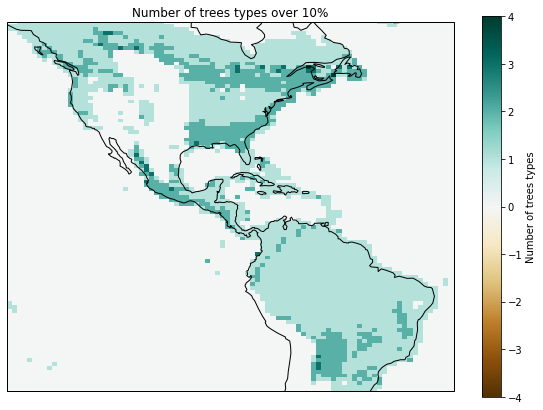

In [17]:
# Plot of trees counts over 10% 

projection = ccrs.PlateCarree()
fig= plt.figure(figsize=(10,7))
ax1 = plt.axes(projection=projection)
ax1.set_global()
ax1.coastlines()
ax1.set_extent([-140, -30, -19, 45])


plt.pcolor(lon_vector, lat_vector, trees_count, transform=ccrs.PlateCarree(), cmap = 'BrBG', vmin = -4, vmax = 4)


plt.colorbar(label = 'Number of trees types')
plt.title('Number of trees types over 10%')

Text(0.5, 1.0, 'C3 Grass over 10%')

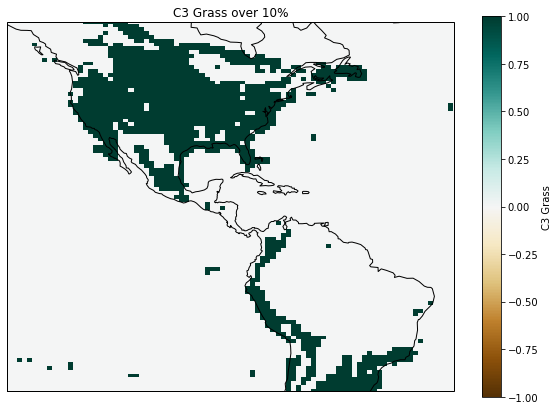

In [18]:
# Plot of C3 grasses over 10% 

projection = ccrs.PlateCarree()
fig= plt.figure(figsize=(10,7))
ax1 = plt.axes(projection=projection)
ax1.set_global()
ax1.coastlines()
ax1.set_extent([-140, -30, -19, 45])


plt.pcolor(lon_vector, lat_vector, plant_13, transform=ccrs.PlateCarree(), cmap = 'BrBG', vmin = -1, vmax = 1)


plt.colorbar(label = 'C3 Grass')
plt.title('C3 Grass over 10%')

Text(0.5, 1.0, 'C4 Grass over 10%')

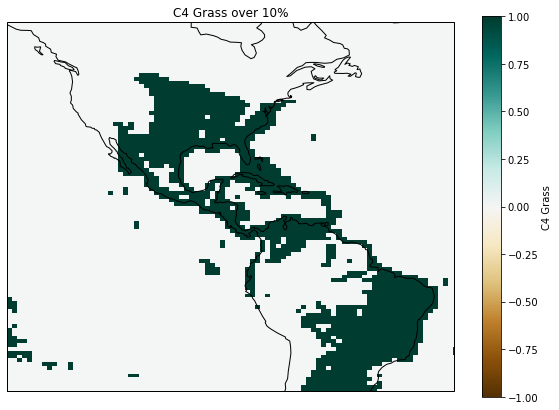

In [19]:
# Plot of C4 grasses over 10% 

projection = ccrs.PlateCarree()
fig= plt.figure(figsize=(10,7))
ax1 = plt.axes(projection=projection)
ax1.set_global()
ax1.coastlines()
ax1.set_extent([-140, -30, -19, 45])


plt.pcolor(lon_vector, lat_vector, plant_14, transform=ccrs.PlateCarree(), cmap = 'BrBG', vmin = -1, vmax = 1)


plt.colorbar(label = 'C4 Grass')
plt.title('C4 Grass over 10%')

/home/disk/p/rlys/anaconda3/envs/pangeo_copy/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1665: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


Text(0.5, 1.0, 'Number of Grasses over 10%')

/home/disk/p/rlys/anaconda3/envs/pangeo_copy/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


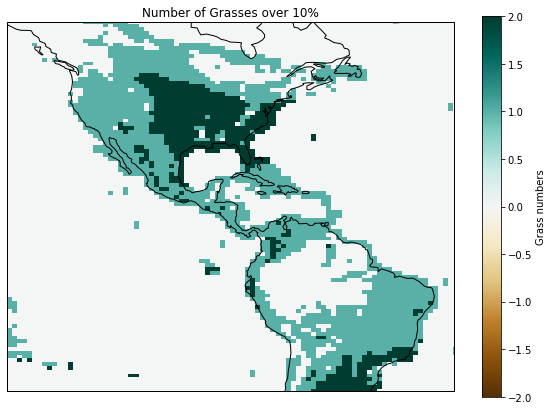

In [20]:
# Plot of grasses count over 10% 

projection = ccrs.PlateCarree()
fig= plt.figure(figsize=(10,7))
ax1 = plt.axes(projection=projection)
ax1.set_global()
ax1.coastlines()
ax1.set_extent([-140, -30, -19, 45])


plt.pcolor(lon_vector, lat_vector, plant_13+plant_14, transform=ccrs.PlateCarree(), cmap = 'BrBG', vmin = -2, vmax = 2)


plt.colorbar(label = 'Grass numbers')
plt.title('Number of Grasses over 10%')

In [12]:
# Grab combined hansen data set from Combining_forestloss_data
%store -r ds_merged_small
print(ds_merged_small.shape)


# Index for the year 2000 of the climate sim data
sim_2000 = PCT_NAT_PFT[150,:,:,:]

# Reinitialize the lat and lon vectors 
lat_vector = np.arange(-90,90, 180/192)
lon_vector = np.arange(0,360, 360/288)

# Lat and lon min and max for the region selected in the Hansen data
lat_max = 60
lat_min = -30
lon_max = 330
lon_min = 220

(90, 110, 16)


In [13]:
# Rewrite the coordinates of the simulation data to the lat and lon vectors (put it in the 180 x 360 scale)
sim_2000['lsmlat'] = lat_vector
sim_2000['lsmlon'] = lon_vector


In [14]:
# Select the part of sim data that matches the Hansen data selected
sim_2000_small = sim_2000.where((sim_2000.lsmlat >= lat_min) & (sim_2000.lsmlat <= lat_max) & \
                                (sim_2000.lsmlon >= lon_min) & (sim_2000.lsmlon <= lon_max))

In [15]:
# Set Hansen data to new lon and lat in the same numbers as the sim data (-90 to 90, and 0 to 360)
lat_ds_vector = np.arange(-30, 60)
lon_ds_vector = np.arange(220, 330)
print(lon_ds_vector.shape)
print(lat_ds_vector.shape)

ds_merged_small['lat'] = lat_ds_vector
ds_merged_small['lon'] = lon_ds_vector

(110,)
(90,)


In [16]:
# Combined the chunks in Hansen into 1 chunk
hansen_ds = ds_merged_small.chunk(chunks = 110)

In [17]:
# Take isolated Sim data and rename coord labels to match
sim_2000_rename = sim_2000_small.rename({'lsmlat' : 'lat', 'lsmlon' : 'lon'}) #[1,:,:] #(potoentially needed for interp)

In [18]:
# Interp the hansen data to the format of the sim data

#test = ds_merged_small.interp_like(renamed_sim, method='linear', assume_sorted=False, kwargs=None)
hansen_ds = hansen_ds.interp(lon = sim_2000_rename['lon'], lat = sim_2000_rename['lat'], method='nearest')

hansen_ds

<xarray.DataArray 'Percent' (lat: 192, lon: 288, year: 16)>
dask.array<transpose, shape=(192, 288, 16), dtype=float64, chunksize=(192, 288, 16), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 2000 2001 2002 2003 2004 ... 2011 2012 2013 2014 2015
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.19 ... 87.19 88.12 89.06
    time     int32 2000

In [19]:
%store hansen_ds

Stored 'hansen_ds' (DataArray)


/home/disk/p/rlys/anaconda3/envs/pangeo_copy/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1665: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


/home/disk/p/rlys/anaconda3/envs/pangeo_copy/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


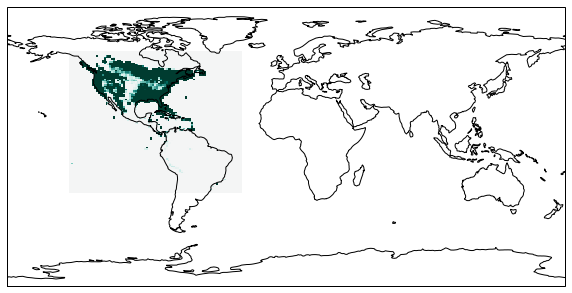

In [28]:
# Test plot of the isolated sim data 
projection = ccrs.PlateCarree()
fig= plt.figure(figsize=(10,7))
ax1 = plt.axes(projection=projection)
ax1.set_global()
ax1.coastlines()
#ax1.set_extent([-140, -30, -19, 45])


plt.pcolor(sim_2000_small['lsmlon'], sim_2000_small['lsmlat'], sim_2000_small[1,:,:], \
           transform=ccrs.PlateCarree(), cmap = 'BrBG', vmin = -2, vmax = 2)


/home/disk/p/rlys/anaconda3/envs/pangeo_copy/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1665: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


/home/disk/p/rlys/anaconda3/envs/pangeo_copy/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


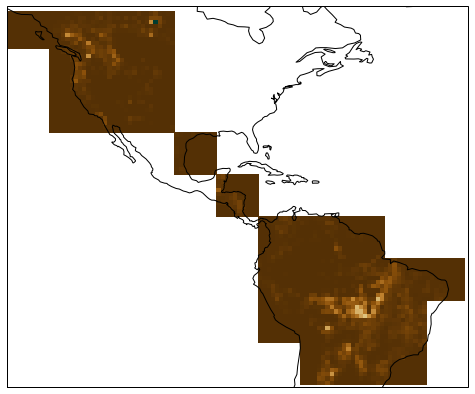

In [29]:
# Test plot of the intital hansen data 
projection = ccrs.PlateCarree()
fig= plt.figure(figsize=(10,7))
ax1 = plt.axes(projection=projection)
ax1.set_global()
ax1.coastlines()
ax1.set_extent([-140, -30, -19, 45])

plt.pcolor(ds_merged_small['lon'], ds_merged_small['lat'], ds_merged_small[:,:,2], 
           transform=ccrs.PlateCarree(), cmap = 'BrBG') #, vmin = -2, vmax = )


/home/disk/p/rlys/anaconda3/envs/pangeo_copy/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1665: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


/home/disk/p/rlys/anaconda3/envs/pangeo_copy/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


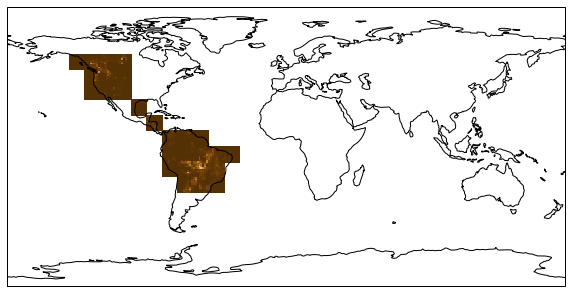

In [50]:
# Plot of regrided Hansen dataset
projection = ccrs.PlateCarree()
fig= plt.figure(figsize=(10,7))
ax1 = plt.axes(projection=projection)
ax1.set_global()
ax1.coastlines()
#ax1.set_extent([-140, -30, -19, 45])

plt.pcolor(hansen_ds['lon'], hansen_ds['lat'], hansen_ds[:,:,2], 
           transform=ccrs.PlateCarree(), cmap = 'BrBG') #, vmin = -2, vmax = )

In [ ]:
print(type(hansen_ds))
print((hansen_ds.shape))

print(type(sim_2000_small))
print((sim_2000_small.shape))


In [52]:
%store hansen_ds_2000
%store sim_2000


Stored 'hansen_ds_2000' (DataArray)
Stored 'sim_2000' (DataArray)


In [51]:
hansen_ds_2000 = hansen_ds[:,:,0]
#print((hansen_ds_2000.shape))

new_2000 = sim_2000
for i in np.arange(0,192): #192):
    for j in np.arange(70,71): #288):
        obs = hansen_ds_2000[i,j]
        obs = obs.values
        if obs > 0:
            print(obs)
        


/home/disk/p/rlys/anaconda3/envs/pangeo_copy/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1665: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


/home/disk/p/rlys/anaconda3/envs/pangeo_copy/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


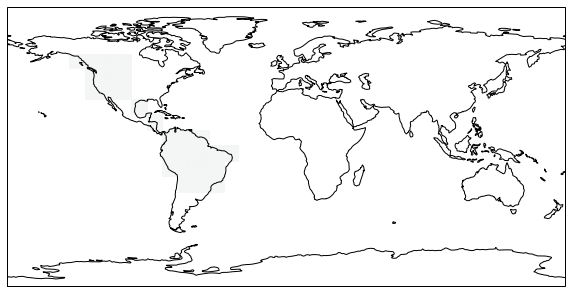

In [366]:
# Test plot of the hansen dataset

projection = ccrs.PlateCarree()
fig= plt.figure(figsize=(10,7))
ax1 = plt.axes(projection=projection)
ax1.set_global()
ax1.coastlines()
#ax1.set_extent([-140, -30, -19, 45])


plt.pcolor(test['lon'], test['lat'], test[:,:,0], transform=ccrs.PlateCarree(), cmap = 'BrBG', vmin = -2, vmax = 2)


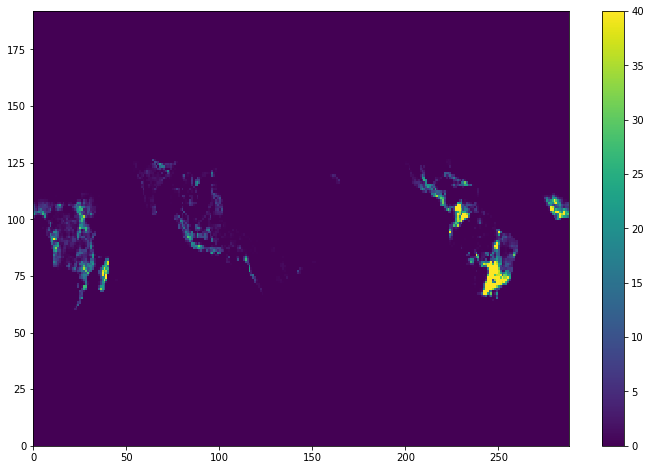

In [45]:
# Rough plot with all of type 4, negative 

plt.figure(figsize=(12,8))
diff_00_15 = PCT_NAT_PFT[165,4,:,:] - PCT_NAT_PFT[0,4,:,:]
#diff_00_15 = PCT_NAT_PFT[165,1:13,:,:].sum(dim='natpft') - PCT_NAT_PFT[130,1:13,:,:].sum(dim='natpft')

plt.pcolor(diff_00_15*(-1), vmin = 0, vmax = 40)
plt.colorbar()


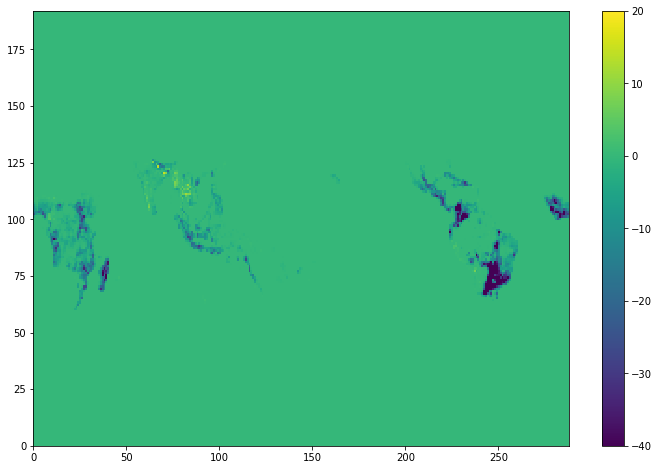

In [166]:
# Rough plot with all of type 4, positive
plt.figure(figsize=(12,8))
diff_00_15 = PCT_NAT_PFT[165,4,:,:] - PCT_NAT_PFT[0,4,:,:]
#diff_00_15 = PCT_NAT_PFT[165,1:13,:,:].sum(dim='natpft') - PCT_NAT_PFT[130,1:13,:,:].sum(dim='natpft')

plt.pcolor(diff_00_15, vmin = -40, vmax = 20)
plt.colorbar()

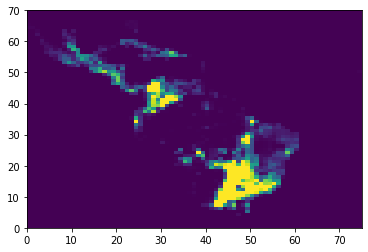

In [34]:
plt.pcolor(diff_00_15[60:130, 200:275]*(-1), vmin = 0, vmax = 40)

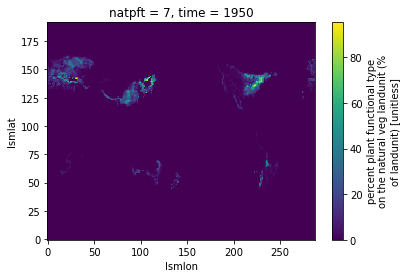

In [28]:
# Quick intro plot

PCT_NAT_PFT = ds.PCT_NAT_PFT
#PCT_NAT_PFT[:,4,:,:].mean(dim='time').plot()
PCT_NAT_PFT[100,7,:,:].plot()

#natpft.mean(dim='time').plot(y = 'lsmlat') #, vmin = 0, vmax = 0.05)

Text(0.5, 1.0, 'Forest Loss 2000-2015')

/home/disk/p/rlys/anaconda3/envs/pangeo_copy/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


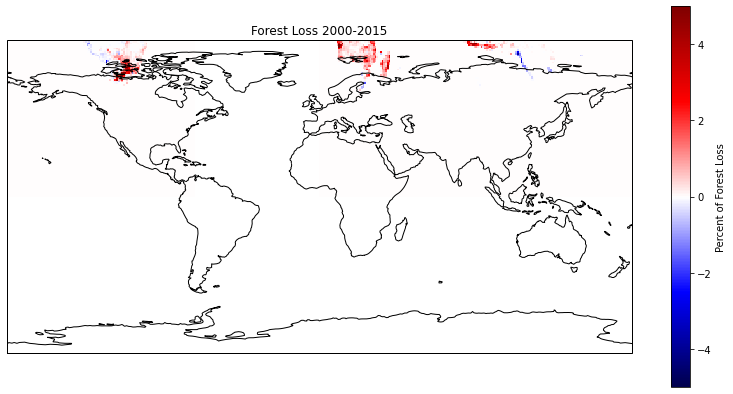

In [32]:
# Issue with the the location of the plot, fixed with lat lon vector adjustments

diff_00_15 = PCT_NAT_PFT[165,4,:,:] - PCT_NAT_PFT[150,4,:,:]
#diff_00_15 = PCT_NAT_PFT[165,1:13,:,:].sum(dim='natpft') - PCT_NAT_PFT[130,1:13,:,:].sum(dim='natpft')

projection = ccrs.PlateCarree()
fig= plt.figure(figsize=(14,7))
ax1 = plt.axes(projection=projection)
ax1.set_global()
ax1.coastlines()
#ax1.set_extent([-140, -30, -30, 60])
cs = plt.pcolor(diff_00_15, transform=ccrs.PlateCarree(), vmin=0, vmax=0.35)

plt.pcolor(diff_00_15*(-1), cmap = 'seismic', vmin = -5, vmax = 5)
plt.colorbar(label = 'Percent of Forest Loss')
plt.title("Forest Loss 2000-2015")


